### Домашнее задание "Корреляция и корреляционный анализ"

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?   
-Построить точечный график   
-Рассчитать коэффициенты корреляции Пирсона и Спирмена   
-Построить модель линейной регрессии   
-Рассчитать коэффициент детерминации   
-Вывести график остатков   

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [103]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [25]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

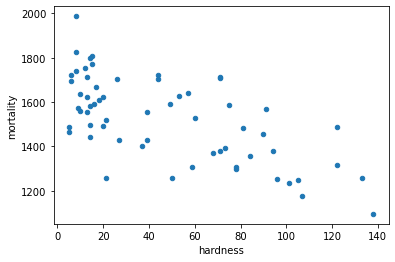

In [27]:
df.plot(kind='scatter', x='hardness', y='mortality')

Предположим, что есть обратная слабая линейная связь между  жесткостью воды и смертностью, т.е. чем вода жестче, тем смертность ниже

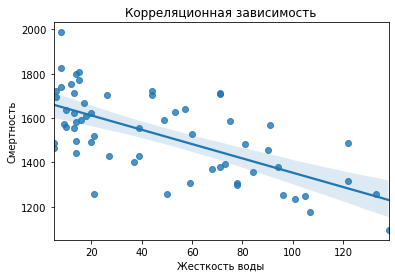

In [28]:
sns.regplot(x = df['hardness'], y = df['mortality'])
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Корреляционная зависимость')
plt.grid(False)
plt.show()

In [29]:
### коэффициент Пирсона

df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [30]:
### коэффициент Спирмена

df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [31]:
### коэффициент Кенделла

df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


Модель линейной регрессии

In [32]:
X = df[['hardness']]
y = df['mortality']

In [33]:
###    делим данные на 70% тренировочных и 30%  тестовых

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)   ### random_state=42 - случайное разбиение

In [34]:
### тренировочные

X_train.shape

(42, 1)

In [35]:
### тренировочные

y_train.shape

(42,)

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [37]:
model.coef_   ### коэффициент при X

array([-3.13167087])

In [38]:
model.intercept_    ### свободный коэффициент 

1668.9722977277095

In [39]:
y_pred = model.predict(X_test)       ### передаем тестовые значения Х и получаем y прогнозный 
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [40]:
### сравниваем прогнозы с фактом

res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df.head(10)


,hardness,y_pred,y_test
0,105,1340.146856,1247
5,10,1637.655589,1558
46,14,1625.128906,1495
31,44,1531.178779,1702
13,78,1424.701970,1307
55,20,1606.338880,1625
34,133,1252.460072,1259
49,75,1434.096982,1587
12,21,1603.207209,1519
40,6,1650.182272,1696


In [41]:
###  коэффициент детерминации

model.score(X_test, y_test) 

0.5046490611017092

Text(0, 0.5, 'Смертность')

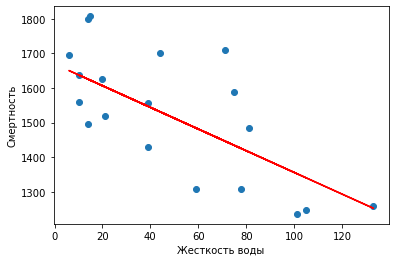

In [42]:
### визуализация факта и линия регрессии  

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')

Зависимость между жесткостью воды и смертностью для данной выборки не прослеживается. Выборка маленького объема.

Альтернативный способ из statsmodel

In [43]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [46]:
X_const.shape

(42, 2)

In [47]:
X[:5]

,hardness
0,105
1,17
2,5
3,14
4,18


In [48]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           7.83e-06
Time:                        17:14:43   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [49]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.3967890100912279


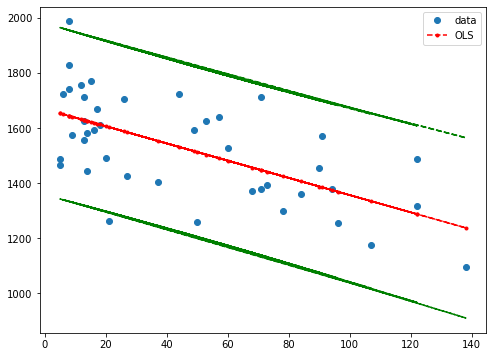

In [50]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

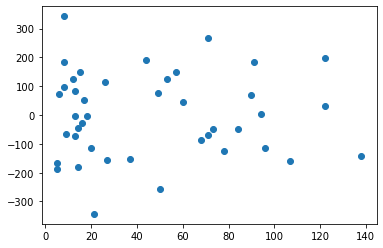

In [51]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

3 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [52]:
# разделяем данные, сначала исследуем южные районы
dfs = df.loc[df['location'] == 'South']
dfs.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

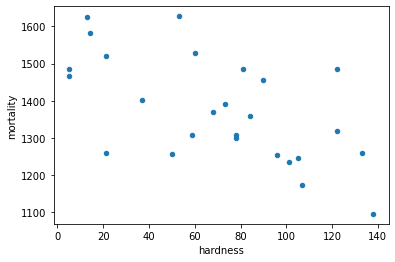

In [53]:
dfs.plot(kind='scatter', x='hardness', y='mortality')

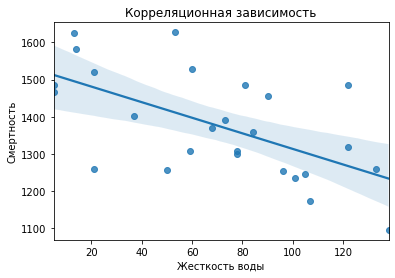

In [54]:
sns.regplot(x = dfs['hardness'], y = dfs['mortality'])
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Корреляционная зависимость')
plt.grid(False)
plt.show()

In [55]:
### коэффициент Пирсона

dfs[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [56]:
### коэффициент Спирмена

dfs[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [57]:
### коэффициент Кенделла

dfs[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


In [58]:
#строим модель линейной регрессии

X_s = dfs[['hardness']]
y_s = dfs['mortality']

In [59]:
###    делим данные на 70% тренировочных и 30%  тестовых

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.30, random_state=42)   ### random_state=42 - случайное разбиение

In [60]:
### тренировочные

X_train_s.shape

(18, 1)

In [61]:
### тренировочные

y_train_s.shape

(18,)

In [62]:
model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [63]:
model_s.coef_   ### коэффициент при X

array([-3.51342921])

In [64]:
model_s.intercept_    ### свободный коэффициент 

1640.2204603423374

In [65]:
y_pred_s = model_s.predict(X_test_s)       ### передаем тестовые значения Х и получаем y прогнозный 
y_pred_s

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [66]:
### сравниваем прогнозы с фактом

### сравниваем прогнозы с фактом

res_dfs = X_test_s.copy()

res_dfs['y_pred_s'] = y_pred_s
res_dfs['y_test_s'] = y_test_s
res_dfs.head(10)

,hardness,y_pred_s,y_test_s
18,122,1211.582096,1318
38,5,1622.653314,1486
0,105,1271.310393,1247
58,122,1211.582096,1486
27,37,1510.223579,1402
19,21,1566.438447,1260
33,59,1432.928137,1309
2,5,1622.653314,1466


In [67]:
#  коэффициент детерминации   
#  мало данных поэтому  такое значение 

model_s.score(X_test_s, y_test_s) 

-2.551922301235205

Text(0, 0.5, 'Смертность')

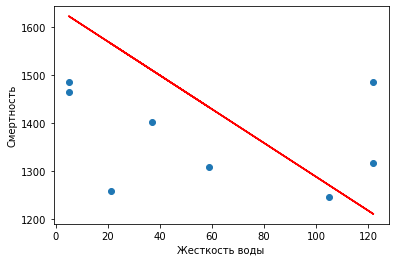

In [68]:
### визуализация факта и линия регрессии  

plt.scatter(X_test_s, y_test_s)
plt.plot(X_test_s, y_pred_s, c='r')
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')

In [69]:
# Альтернативный способ из statsmodel
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [70]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.30, random_state=42)

In [71]:
X_const_s = sm.add_constant(X_train_s) # техническая особенность библиотек, надо руками добавить константу

In [72]:
X_const_s.shape

(18, 2)

In [73]:
model_s = sm.OLS(y_train_s, X_const_s)
results = model_s.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           7.30e-05
Time:                        17:25:41   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.2205     54.471     30.112      0.0

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [74]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1640.220460
hardness      -3.513429
dtype: float64
R2:  0.636380830887719


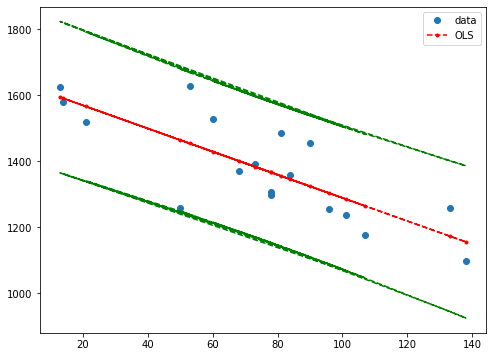

In [76]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const_s.iloc[:, 1], y_train_s, 'o', label="data")
ax.plot(X_const_s.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const_s.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const_s.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

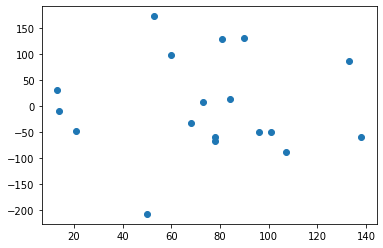

In [77]:
# посмотрим на остатки
plt.scatter(X_const_s.iloc[:, 1], results.resid)

In [78]:
# разделяем данные, теперь исследуем  северные районы
dfn = df.loc[df['location'] == 'North']
dfn.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


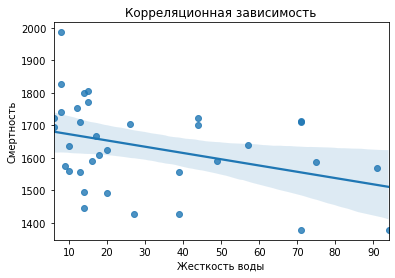

In [79]:
sns.regplot(x = dfn['hardness'], y = dfn['mortality'])
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Корреляционная зависимость')
plt.grid(False)
plt.show()

In [80]:
### коэффициент Пирсона

dfn[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [81]:
### коэффициент Спирмена

dfn[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [82]:
### коэффициент Кенделла

dfn[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


In [83]:
X_n = dfn[['hardness']]
y_n = dfn['mortality']

In [84]:
###    делим данные на 70% тренировочных и 30%  тестовых

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.30, random_state=42)   ### random_state=42 - случайное разбиение

In [85]:
### тренировочные

X_train_n.shape

(24, 1)

In [86]:
model_n = LinearRegression()
model_n.fit(X_train_n, y_train_n)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [87]:
model_n.coef_   ### коэффициент при X

array([-1.97686226])

In [88]:
model_n.intercept_    ### свободный коэффициент 

1688.150229031281

In [89]:
y_pred_n = model_n.predict(X_test_n)       ### передаем тестовые значения Х и получаем y прогнозный 
y_pred_n

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [90]:
### сравниваем прогнозы с фактом

res_dfn = X_test_n.copy()

res_dfn['y_pred_n'] = y_pred_n
res_dfn['y_test'] = y_test_n
res_dfn.head()

,hardness,y_pred_n,y_test
45,8,1672.335331,1987
23,9,1670.358469,1574
43,14,1660.474157,1444
36,6,1676.289055,1724
26,16,1656.520433,1591


In [91]:
###  коэффициент детерминации

model_n.score(X_test_n, y_test_n) 

0.018885304285745863

Text(0, 0.5, 'Смертность')

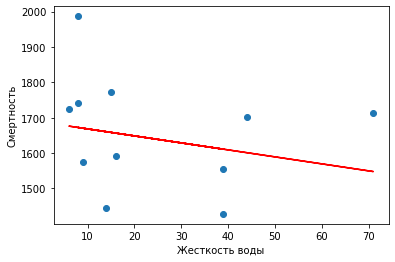

In [92]:
### визуализация факта и линия регрессии  

plt.scatter(X_test_n, y_test_n)
plt.plot(X_test_n, y_pred_n, c='r')
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')

Альтернативный способ

In [251]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [252]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.30, random_state=42)

In [95]:
X_const_n = sm.add_constant(X_train_n) # техническая особенность библиотек, надо руками добавить константу

In [96]:
X_const_n.shape

(24, 2)

In [98]:
model_n = sm.OLS(y_train_n, X_const_n)
results = model_n.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Sat, 17 Jul 2021   Prob (F-statistic):             0.0316
Time:                        17:33:45   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

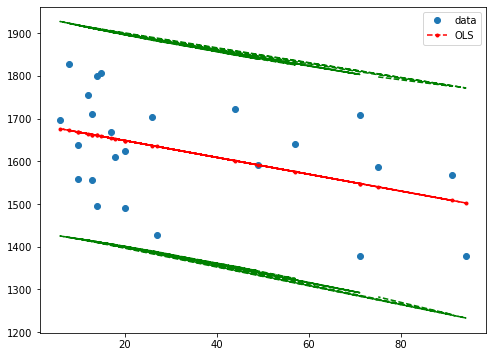

In [99]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const_n.iloc[:, 1], y_train_n, 'o', label="data")
ax.plot(X_const_n.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const_n.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const_n.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

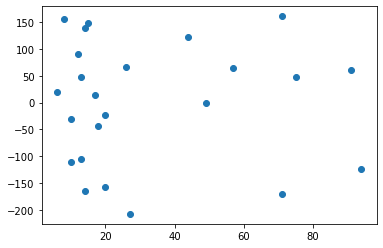

In [100]:
# посмотрим на остатки
plt.scatter(X_const_n.iloc[:, 1], results.resid)

Аналогично по отдельности для северных и южных регионов зависимости не выявлено.